In [75]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix




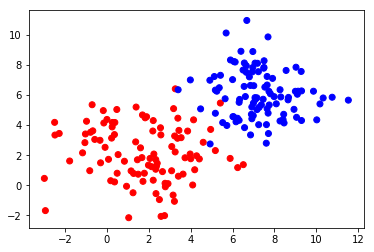

In [76]:
X1=2*np.random.randn(100,2)+np.array([2,2])
X2=1.5*np.random.randn(100,2)+np.array([7,6])
data=np.concatenate((X1,X2),axis=0).T
plt.show()
Y=np.concatenate((np.ones(100),(-1*np.ones(100)))).reshape((200,1))
c=[]
for item in Y:
    if item==1:
        c.append('red')
    else:
        c.append('blue')
plt.scatter(data[0,:],data[1,:],c=c)
plt.show()

In [77]:
X=data
m,n= X.shape
C=1
A1=np.zeros((n,n))
for i in range(n):
    for j in range(n):
        A1[i,j]=np.matmul(X[:,i].T,X[:,j])
A1=A1+(1/C)*np.identity(n)
for i in range(n):
    for j in range(n):
        A1[i,j]=Y[i]*Y[j]*A1[i,j]
Aineq=matrix(-1*np.identity(n))
bineq=matrix(np.zeros((n,1)))


In [78]:
f=-1*np.ones((n,1))
Aeq=matrix(Y.T,tc='d')
beq=matrix(np.array([[0]]),tc="d")
beq


<1x1 matrix, tc='d'>

In [79]:
from cvxopt import solvers
sol = solvers.qp(matrix(A1,tc='d'),matrix(f,tc='d'),Aineq,bineq,Aeq,beq)




     pcost       dcost       gap    pres   dres
 0: -1.4821e+01 -3.8286e+01  5e+02  2e+01  2e+00
 1: -1.7037e+01 -2.6493e+01  9e+01  4e+00  3e-01
 2: -1.0149e+01 -9.4339e+00  1e+01  4e-01  3e-02
 3: -6.5928e+00 -6.9406e+00  1e+00  2e-02  2e-03
 4: -6.4779e+00 -6.5343e+00  9e-02  1e-03  8e-05
 5: -6.5030e+00 -6.5061e+00  4e-03  3e-05  2e-06
 6: -6.5046e+00 -6.5047e+00  1e-04  5e-07  4e-08
 7: -6.5046e+00 -6.5047e+00  1e-05  6e-09  4e-10
 8: -6.5047e+00 -6.5047e+00  1e-06  6e-11  4e-12
Optimal solution found.


In [80]:
alpha=np.array(sol['x'])
w=np.zeros((1,2))
for i in range(n):
    w=w+alpha[i]*Y[i]*X[:,i]

w=w.T

In [81]:
#xx=np.where(alpha.T[0]>.2 )
index_alpha=[]
for i in range(len(alpha)):
    if alpha[i][0]>.5 and C>alpha[i][0]:
        index_alpha.append(i)


sum_X=(X[:,index_alpha].sum(1)).reshape((2,1))
b=(-1/len(index_alpha))*np.matmul(w.T,sum_X)



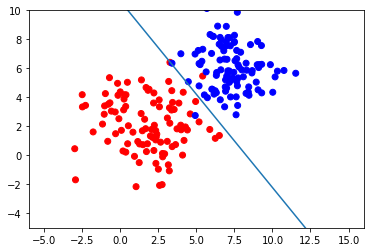

In [82]:
x1=np.linspace(-5,15,200)
x2=-(w[0]/w[1])*x1-b[0]/(w[1])
plt.scatter(X[0,:],X[1,:],c=c)
plt.plot(x1,x2,)
plt.ylim([-5, 10])
plt.show()